### Data Processing

In [1]:
# importing several libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import string

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from matplotlib import rcParams
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier 
from nltk.classify.scikitlearn import SklearnClassifier

In [4]:
# Specify the path to the CSV file
data_path = 'Womens Clothing E-Commerce Reviews.csv'

# Read the CSV file into a DataFrame
df=pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# display column names
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
# check the shape of the dataset, rows and columns
df.shape

(23486, 11)

In [7]:
# Count the number of unique values in each column
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [8]:
# Count the number of nulls in each column
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
# remove any row that contains at least one NaN value
df.dropna(inplace=True)

In [10]:
# reset the index after dropping some rows 
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [11]:
# Check for the missing values after droping the null values 
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
# drop unnecessary culomns 
df.drop(["Unnamed: 0", "Title", 'Clothing ID'], axis=1, inplace=True)

In [13]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [14]:
# to remove spaces in columns and replace them with underscore 
df.columns= df.columns.str.replace(" ", "_")

In [15]:
# Create reviews Tuples to store the words along with the categories 
reviews = []
# go through Recommended IND column and get the category and the index 
for (index , category) in enumerate(df.Recommended_IND):
    reviews.append((df.Review_Text[index],category)) # Store the review for spacific index with catogory inside texts array
# Print first 4
reviews[0:4]

[('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
  0),
 ("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
  1),
 ('This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
  1),
 ('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress 

In [16]:
# create lemmatizer 
lemmatizer = WordNetLemmatizer()

In [17]:
# download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meghamurthy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghamurthy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/meghamurthy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/meghamurthy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Create a list of stopwords 
# Get English stopwords
stops = set(stopwords.words('english'))

# Get a set of specific punctuation marks
punctuations = set(string.punctuation)
#print(punctuations)
# Combine stopwords and punctuation sets
stops.update(punctuations)

In [19]:
# total stopwords
len(stops)

211

In [20]:
# function to get the simpler version of pos tag  to use it in lemmitazation 
def get_simple_pos(tag):
    tag_start = tag[0].upper()
    if tag_start == 'N':
        return wordnet.NOUN
    elif tag_start == 'V':
        return wordnet.VERB
    elif tag_start == 'R':
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default case

In [21]:
# function to return Lemmatized words and cleaned from stop words
def clean_review(words):
    words_tokens = word_tokenize(words)
    
    output_words = [
        lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag))
        for word, tag in pos_tag(words_tokens)
        if word.lower() not in stops and any(c.isalnum() for c in word)
    ]
    
    return output_words

In [22]:
cleaned_words = clean_review("My cats are running away from my arms")
print(cleaned_words)

['cat', 'run', 'away', 'arm']


In [23]:
cleaned_reviews= [(clean_review(text),category )for text,category  in reviews]

In [24]:
# copy clean version into excel spreadsheet 
# Create a DataFrame from the list of tuples
df = pd.DataFrame(cleaned_reviews, columns=['Cleaned_Text', 'Category'])

# Save the DataFrame to an Excel file
#df.to_excel('cleaned_data.xlsx', index=False)

In [25]:
#check first 5 reviews 
cleaned_reviews[0:5]

[(['high',
   'hope',
   'dress',
   'really',
   'want',
   'work',
   'initially',
   'order',
   'petite',
   'small',
   'usual',
   'size',
   'find',
   'outrageously',
   'small',
   'small',
   'fact',
   'could',
   'zip',
   'reorder',
   'petite',
   'medium',
   'ok.',
   'overall',
   'top',
   'half',
   'comfortable',
   'fit',
   'nicely',
   'bottom',
   'half',
   'tight',
   'layer',
   'several',
   'somewhat',
   'cheap',
   'net',
   'layer',
   'imo',
   'major',
   'design',
   'flaw',
   'net',
   'layer',
   'sewn',
   'directly',
   'zipper',
   'c'],
  0),
 (['love',
   'love',
   'love',
   'jumpsuit',
   "'s",
   'fun',
   'flirty',
   'fabulous',
   'every',
   'time',
   'wear',
   'get',
   'nothing',
   'great',
   'compliment'],
  1),
 (['shirt',
   'flattering',
   'due',
   'adjustable',
   'front',
   'tie',
   'perfect',
   'length',
   'wear',
   'legging',
   'sleeveless',
   'pair',
   'well',
   'cardigan',
   'love',
   'shirt'],
  1),
 (['lo

### Sentiment Analysis

In [26]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
training_words, testing_words = train_test_split(cleaned_reviews, test_size=0.2, random_state=42)


In [28]:
print(f"Training Data = {len(training_words)}")
print(f"Testing Data = {len(testing_words)}")

Training Data = 15729
Testing Data = 3933


In [29]:
# array contaning all words 
words_list=[]
for word in training_words:
        words_list+=word[0] # 0 index to get only the words 

In [30]:
# Total words in traning data 
len(words_list)

490031

In [31]:
#frequency distribution for all words 
freq= nltk.FreqDist(words_list)
# The .most_common() method lists the words which occur most frequently in the data along with the frequency
common=freq.most_common()
# features are an array of only the top words in word list without The number of words 
features= [i[0]for i in common]

In [32]:
print(len(common))
print(len(features))

13734
13734


In [33]:
# Most common 5 words 
common[0:5]

[('dress', 8570),
 ('fit', 7719),
 ('size', 7403),
 ('love', 7092),
 ('wear', 7011)]

In [34]:
# List of 5 features 
features[0:5]

['dress', 'fit', 'size', 'love', 'wear']

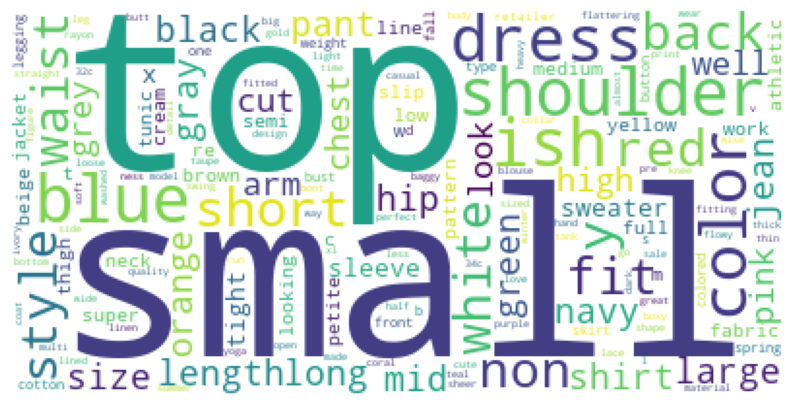

In [35]:
# Visualizing the highest repeating words (features)

# wordcload is techniqe use to show which words are the most frequent 
wordCloud = WordCloud(background_color="white", max_words =3000).generate(" ".join(features))

rcParams["figure.figsize"]= 10,20
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

In [36]:
# function to return a set of the features with true or false 
def get_dict_for_feature(words):
  current_features={}
  words_set= set(words)
  for word in features:
    current_features[word] = word in words_set  # if word comes in words set it will return True otherwise False 
  return current_features

In [37]:
features_dic= get_dict_for_feature(training_words[0][0])

In [38]:
# Dictionary containing all words with True classification if the word exists in each review otherwise false  
features_dic  

{'dress': False,
 'fit': False,
 'size': False,
 'love': False,
 'wear': False,
 'look': True,
 "n't": False,
 'top': False,
 "'s": False,
 'like': False,
 'color': False,
 "'m": False,
 'great': True,
 'would': False,
 '5': False,
 'order': False,
 'get': False,
 'fabric': False,
 'small': False,
 'make': False,
 'go': False,
 'buy': True,
 'really': False,
 'well': False,
 'perfect': False,
 'one': True,
 'little': False,
 'try': False,
 'think': False,
 'soft': False,
 'back': False,
 'nice': False,
 'run': False,
 'comfortable': True,
 'cute': False,
 'work': False,
 'bit': False,
 'material': False,
 'large': False,
 'beautiful': False,
 'shirt': False,
 'length': False,
 'sweater': True,
 'much': False,
 'also': False,
 'jean': False,
 'petite': False,
 'long': False,
 'could': False,
 'short': False,
 'waist': False,
 'purchase': False,
 'skirt': False,
 'medium': False,
 'even': False,
 'quality': False,
 'retailer': False,
 'pretty': False,
 'feel': False,
 'want': False,
 'x'

In [39]:
# create dic for each review wich has feature with value and the category
training_words= [( get_dict_for_feature(words),category ) for words , category in training_words]
testing_words = [( get_dict_for_feature(words),category ) for words , category in testing_words]

In [40]:
training_words[1]

({'dress': False,
  'fit': True,
  'size': True,
  'love': False,
  'wear': True,
  'look': False,
  "n't": False,
  'top': True,
  "'s": False,
  'like': False,
  'color': True,
  "'m": False,
  'great': True,
  'would': False,
  '5': False,
  'order': False,
  'get': False,
  'fabric': False,
  'small': False,
  'make': True,
  'go': False,
  'buy': False,
  'really': False,
  'well': False,
  'perfect': False,
  'one': False,
  'little': True,
  'try': False,
  'think': False,
  'soft': False,
  'back': False,
  'nice': False,
  'run': True,
  'comfortable': False,
  'cute': False,
  'work': False,
  'bit': False,
  'material': False,
  'large': False,
  'beautiful': True,
  'shirt': False,
  'length': False,
  'sweater': False,
  'much': False,
  'also': False,
  'jean': False,
  'petite': False,
  'long': True,
  'could': False,
  'short': False,
  'waist': False,
  'purchase': True,
  'skirt': False,
  'medium': False,
  'even': True,
  'quality': False,
  'retailer': False,
  'p

In [41]:
# to the classifier we need to use NaiveBayesClassifier and pass the training words to it 
NB_classifier= NaiveBayesClassifier.train(training_words)
print("classifier accuracy percent:",(nltk.classify.accuracy(NB_classifier, training_words))*100)

classifier accuracy percent: 91.57606968020853


In [42]:
print("classifier accuracy percent:",(nltk.classify.accuracy(NB_classifier, testing_words))*100)

classifier accuracy percent: 88.1769641495042


In [45]:
review_1="I am not sure whether the shirt looks good on me or not and since it is costly, I am thinking of returning it."
review_2="I am not sure whether the shirt looks good on me or not, but since it is budget friendly, I am thinking of keeping it."
reviews = [review_1,review_2]


def test_custom_review(reviews_list, classifier):
    
    for idx,review in enumerate(reviews_list) : 
        custom_tokens = clean_review(review)
        print(f"The clean review is : "  , str(custom_tokens).replace('[','').replace(']',''))
        classifiers=classifier.classify(dict([token, True] for token in custom_tokens))
        if (classifiers == 1):
            pred = "Positive"
        else:
            pred = "Negative"
        print(f"Review number {idx +1 }  seems to be {pred} \n")

In [46]:
test_custom_review(reviews,NB_classifier)

The clean review is :  'sure', 'whether', 'shirt', 'look', 'good', 'since', 'costly', 'think', 'return'
Review number 1  seems to be Negative 

The clean review is :  'sure', 'whether', 'shirt', 'look', 'good', 'since', 'budget', 'friendly', 'think', 'keep'
Review number 2  seems to be Positive 

